In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from exp_analysis import *

In [2]:
import corner

In [21]:
hierarchy = 'heavy'
n_evt = 1000000
m4_limits = (0.005, 1)
mz_limits = (0.005, 3)
minimal = 'minimal'

In [16]:
samples = np.load(f'mcmc_{hierarchy}_{minimal}.npy')

SyntaxError: f-string: expecting '}' (<ipython-input-16-4a3197c12335>, line 1)

In [7]:
samples.shape[0]/9

20000.0

## Basic plots

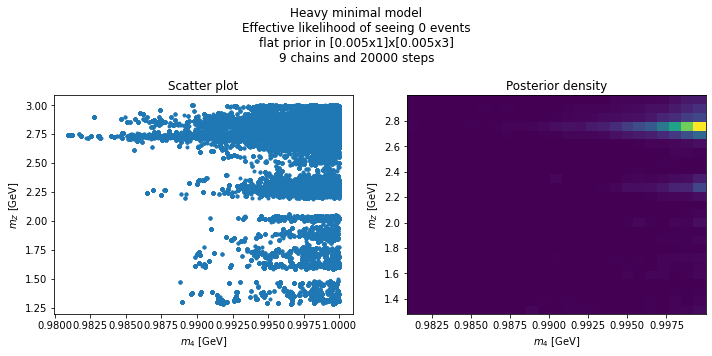

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f'Heavy minimal model\nEffective likelihood of seeing 0 events\nflat prior in [{m4_limits[0]}x{m4_limits[1]}]x[{mz_limits[0]}x{mz_limits[1]}]\n9 chains and 20000 steps')


ax1.plot(samples[:,0], samples[:,1], '.')
ax1.set_title('Scatter plot')
ax1.set_xlabel(r'$m_4$ [GeV]')
ax1.set_ylabel(r'$m_Z$ [GeV]')

ax2.hist2d(samples[:,0], samples[:,1], density=True, bins=(25, 25))
ax2.set_title('Posterior density')
ax2.set_xlabel(r'$m_4$ [GeV]')
ax2.set_ylabel(r'$m_Z$ [GeV]')

fig.tight_layout()
# plt.savefig(f"{save_folder}scatter_Nwalkers_{nwalkers}_nstep_{nstep}_{selection_step}.png", bbox_inches='tight', dpi=250)

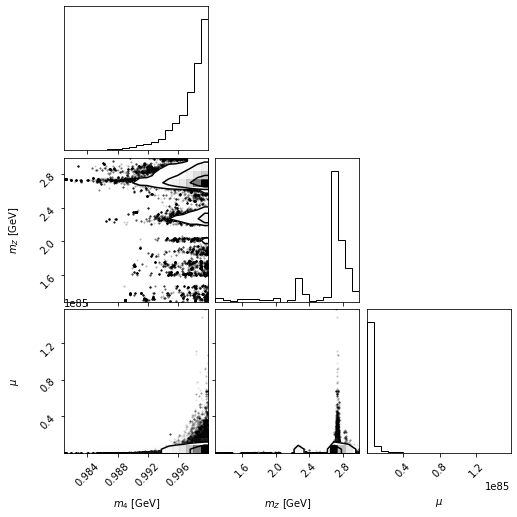

In [29]:
figure = corner.corner(samples, labels=[r'$m_4$ [GeV]', r'$m_Z$ [GeV]', r'$\mu$'])

In [30]:
samples[:,2]

array([1.28080035e+83, 7.92506755e+81, 4.53826157e+84, ...,
       2.87945857e+81, 2.87799623e+81, 7.48304046e+83])

In [ ]:
# samples[:,2] = samples[:,2]*Vmu4
# samples[:,3] = samples[:,3]*alpha_epsilon2
# ctau_fit = ctau_light(samples[:, 0], samples[:, 1], samples[:,2])
# aux_sample = np.concatenate([samples, ctau_fit[...,np.newaxis]], axis=1)
# aux_sample_with_logs = aux_sample
# aux_sample_with_logs[:,2] = np.log10(aux_sample_with_logs[:,2])
aux_sample_with_logs[:,3] = np.log10(aux_sample_with_logs[:,3])
aux_sample_with_logs[:,4] = np.log10(aux_sample_with_logs[:,4])